<a href="https://colab.research.google.com/github/Sahil-Jagadale/DL/blob/main/DL_Autoencoder_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense,Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('./datasets/creditcard.csv')
#df = pd.read_csv('./datasets/ecg_autoencoder_dataset.csv',header=None)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
x = df.drop('Class', axis=1)
y = df['Class']

#x = df.drop([140], axis=1)
#y = df[140]

In [5]:
scaler = StandardScaler()
#is a feature scaling technique that standardizes the features of your dataset by transforming them to have a mean of 0 and a standard deviation of 1.

x_scaled = scaler.fit_transform(x)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2, random_state=2)
x_normal = x_train[y_train == 0]

In [7]:
# Encoder Model
encoder = Sequential([
    Input(shape=(x_train.shape[1],)),  # Use x_train.shape[1] to get the number of features
    Dense(64, activation='relu'),
    Dropout(0.1),  # Used to randomly drop 10% of connections during training
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu')
])

# Decoder Model
decoder = Sequential([
    Input(shape=(16,)),  # Latent space of size 16
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(x_train.shape[1], activation='sigmoid')  # Output layer with the same number of features as input
])

# Autoencoder Model
autoencoder = Sequential([
    encoder, 
    decoder   
])

autoencoder.compile(optimizer='adam', loss='mse', metrics=['msle'])
#MSE (Mean Squared Error) is a common loss function used for regression tasks, 
#where the goal is to minimize the difference between predicted values and actual values.
#MSLE (Mean Squared Logarithmic Error) is a metric used to evaluate the performance of the model 

In [8]:
history = autoencoder.fit(x_normal,x_normal, epochs=20, batch_size=256, validation_split=0.1, shuffle=True)
#batch_size is the number of samples the model processes before updating its internal parameters (weights).
#validation_split specifies the percentage of the training data to set aside for validation.
#shuffle=True means the data will be randomly shuffled before each epoch.

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9446 - msle: 0.1160 - val_loss: 0.7861 - val_msle: 0.0731
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8071 - msle: 0.0775 - val_loss: 0.7538 - val_msle: 0.0609
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7865 - msle: 0.0701 - val_loss: 0.7418 - val_msle: 0.0570
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7732 - msle: 0.0668 - val_loss: 0.7337 - val_msle: 0.0540
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7609 - msle: 0.0641 - val_loss: 0.7303 - val_msle: 0.0528
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7641 - msle: 0.0629 - val_loss: 0.7268 - val_msle: 0.0514
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7702 - msle: 0.0617 - val_loss: 0.7235 - val_msle: 0.0500
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7617 - msle: 0.0596 - val_loss: 0.7138 - val_msle: 0.0473
Epoch 9/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
reconstruction = autoencoder.predict(x_normal)
#uses the trained autoencoder model to predict (reconstruct) each input sample in x_normal.

recon_errors = np.mean(np.square(reconstruction-x_normal), axis=1)
#This calculates the reconstruction error for each sample by computing the mean squared error (MSE) between each input in x_normal and its reconstruction.

threshold = np.percentile(recon_errors,95)
#This means that any data point with a reconstruction error above this threshold will likely be considered an anomaly, 
#as it falls in the top 5% of reconstruction errors (indicating it doesn’t fit well with the model’s learned normal data patterns).
print(threshold)

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 4s 545us/step
1.4240122901296524


In [10]:
prediction = autoencoder.predict(x_test)
pred_erros = np.mean(np.square(prediction - x_test), axis=1)

y_pred = [1 if error > threshold else 0 for error in pred_erros]

accuracy = accuracy_score(y_pred,y_test)
confusion_matrix = confusion_matrix(y_pred,y_test)
classification_report = classification_report(y_pred,y_test)

print("Accuracy: ",accuracy)
print("Confusion Matrix: ",confusion_matrix)
print("Classification Report: ",classification_report)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step
Accuracy:  0.9497033109792493
Confusion Matrix:  [[54022     9]
 [ 2856    75]]
Classification Report:                precision    recall  f1-score   support

           0       0.95      1.00      0.97     54031
           1       0.89      0.03      0.05      2931

    accuracy                           0.95     56962
   macro avg       0.92      0.51      0.51     56962
weighted avg       0.95      0.95      0.93     56962



In [11]:
anamolies = pred_erros > threshold

num_anomalies = np.sum(anamolies)

print("Total number of anamolies are: ",num_anomalies)

Total number of anamolies are:  2931


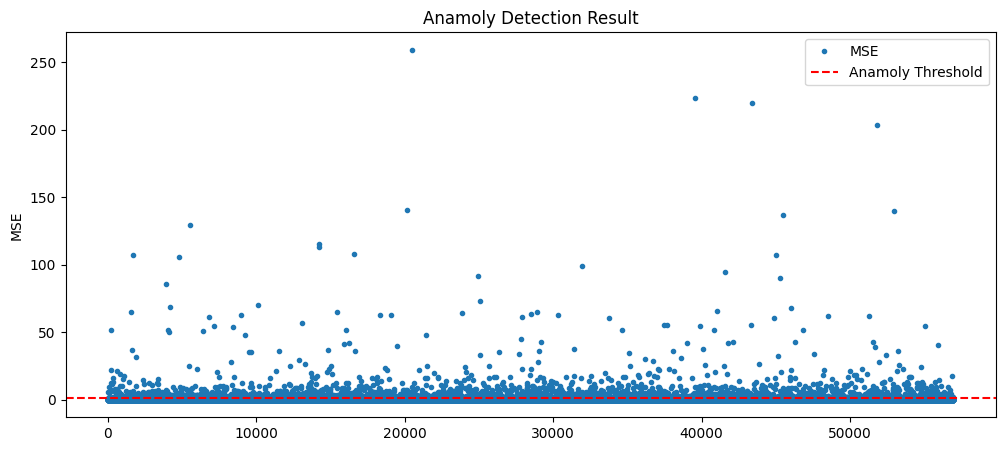

In [12]:
plt.figure(figsize=(12,5))
plt.plot(pred_erros, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anamoly Threshold')
plt.ylabel('MSE')
plt.title('Anamoly Detection Result')
plt.legend()
plt.show()

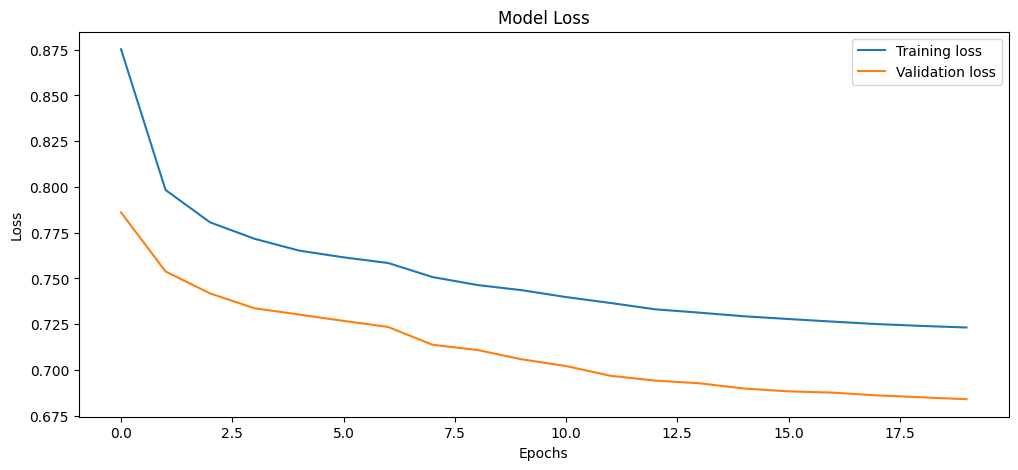

In [13]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()